# Machine Learning with SKLearn and Python

Once we have gotten ourselves acquainted with python and use of Pandas to work we data we are ready to work with a few of the libraries in Python to make predictions.

In Machine learning we will be looking at Supervised and unsupervised models as well as Regressors and Classifyers.

For Regressors there are the following methods avaliable:

* Simple Linear Regression
* Multiple Linear Regression
* Polynomial Regression
* Support Vector Regression
* Regression Trees
* Random Forest

For the Classifiers we will look at:

* Logistic Regression
* KNN
* Classification Trees
* Random Forest
* SVM
* Kernel SVM
* Naive Bayes

For all of the methods that we will be looking at we will need to load in a relevant data set and also import the correct classifier to make the prediction and fit the data.

## Regression vs Classification

The best way to think about the differences is the final outcome. With a Regressor we have a numerical value that we are trying to predict so the values could be anything between a maximum and a minimum value (For instance price or Mark Achieved), with Classification we are predicting a categorical varaible (So a variable in which you have to fit one of multiple predescribed classes (Gender or age group for instance).

# Regressors:
## Simple linear Regression

Simple linear regression is the most simple form of a regression model, this model we are predicting our dependend variable $Y$ with only a single independent variable $X$.

If we were to look at the overall function we are fitting we have the following $y=b_0 + b_1x_1$. 

In this example we have data on the salary of an employee and their years of experience. We will be using this information to see if we can predict the Salary they should Achieve.


The first part is the import of the data to use it:

In [1]:
import pandas as pd

dataset = pd.read_csv('data\\Salary_Data.csv')
x = dataset.iloc[:,0].values
y = dataset.iloc[:,1].values

As we only have $n=30$ we will not split the sample into a train and test set.  

now that we have the dataset imported we can import the regresor and make our first prediction model:

In [2]:
from sklearn.linear_model import LinearRegression
slregressor = LinearRegression()
slregressor.fit(x.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We have now fitted the model.

All of the information relating to the fitted model is contained in the instance we have created of the LinearRegression object.

Let's have a look at some of the variables we can obtain from this fitted model:

In [3]:
print("Intercept: " + str(slregressor.intercept_))
print("Coefficient: " + str(slregressor.coef_))

Intercept: 25792.20019866871
Coefficient: [9449.96232146]


This is certainly not the output that most people are used to as we are not getting a single output will all of the details we need but rather we need to call up the individual items we require. This may not be what we are expecting but we will be looking at a different library later that will provide similar output to what we are used to.

Now that we have fitted the model let's start by running some predictions using the model:

In [4]:
slregressor.predict([[6.5]])

array([87216.95528813])

We can now say that a person with 6.5 years worth of experience should be earning a salary of 87 217. But we may not always want to predict a single item, so let's plot the line we have fitted to the data:

Text(0.5, 1.0, 'Expected Salary based on years of experience')

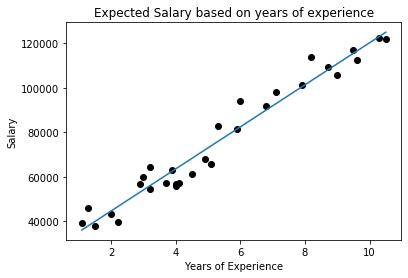

In [5]:
import matplotlib.pyplot as plt

plt.scatter(x,y,color='black')
plt.plot(x,slregressor.predict(x.reshape(-1,1)))
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Expected Salary based on years of experience")

This was simple enough and we can see the overall graph that was fitted. But we won't always have just one independent variable and will need to look at an example with more independents.

## Multiple Linear Regression

This method is very similar to the simple Linear Regression where we are fitting a straight line to the data however the big difference is the number of independent varables that we have in the model to predict the data, so the function now looks like this:

 - $Y=b_0 + b_1 x_1 + b_2 x_2 + ... + b_n x_n$
 
 In our example for Multiple linear regression we will be predicting the profit of a company based on R & D Spend, Administration, Marketing Spend and the state.
 
 We will need to do a bit of data clean up as we can't insert text into the model for prediction (So will need to create dummy variables.
 

In [6]:
dataset=pd.read_csv('data\\50_Startups.csv')

y = dataset.iloc[:,4]
x = dataset.iloc[:,:3]
x_dummy = pd.get_dummies(dataset.iloc[:,3])
x = x.join(x_dummy.iloc[:,:-1],how='right')

Now we have a new function that we can use, **get_dummies** from **pandas**, this will take any text columns and create the dummy variables from the text. We must also just remember to remove one of the dummies as we run the model with $n-1$ dummies if they are exclusive.

Let's now fit the model, we will be using the same created instance as the simple linear regression:

In [7]:
slregressor.fit(x,y)

print('Intercept: ' +str(slregressor.intercept_))
print('Coefficients: '+str(slregressor.coef_))

Intercept: 50083.45681250342
Coefficients: [ 8.06023114e-01 -2.70043196e-02  2.69798610e-02  4.18870191e+01
  2.40675812e+02]


The only problem with this is we can't use a forward or backward method to see which variables to include or exclude as we don't have the p-values.

So we will now have a look at a different library (Which was mentioned earlier that will show us a lot more information).

This model also does not automatically include an intercept so we need to add one in manually.

In [8]:
import statsmodels.api as sm

x=sm.add_constant(x)  
reg2 = sm.OLS(endog=y,exog=x)

reg2.fit().summary()



c:\users\adam\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 26 Feb 2020   Prob (F-statistic):           1.34e-27
Time:                        16:05:02   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
R&D Spend           0.8060      0.046     17.369      0.000       0.712       0.900
Administration     -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend     0.0270      0.017      1.574      0.123      -0.008       0.062
California         41.8870   3256.039      0.013      0.990   -6520.229    6604.003
Florida           240.6758   3338.857      0.072      0.943   -6488.349    6969.701
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.47e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now this look more like the variables we are used to to with all of the measures and the P-values for the coefficients to make decisions around which of the variables should be included and removed.

We also see that there are some warning that have been brought to our attention including a multicollinearity warning, Let's see how we can run a Vif score to check for Multicollinearity:

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = pd.DataFrame()
VIF['Features']=x.columns
VIF['VIF']  = [variance_inflation_factor(exog=x.values,exog_idx=i) for i in range(x.shape[1])]
VIF

,Features,VIF
0,const,27.126379
1,R&D Spend,2.495511
2,Administration,1.177766
3,Marketing Spend,2.416797
4,California,1.335061
5,Florida,1.361299


From this point we can keep rerunning the models until we have removed all of the variables that are not significant in the overall model and if there is multicollinearity in the model we can control for it.

## Polynomial regression 

This is a non linear model but the regression formula is still additive so we can use OLS on this model. 

For this technique and the future techniques we will be using the same data which is the prediction of salary based on a person's level in the business. 

Let's consider the data and see the type of function that can be fitted:

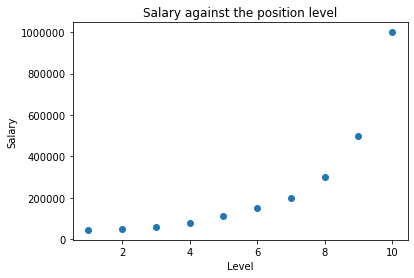

In [10]:
dataset = pd.read_csv('data\Position_Salaries.csv')
plt.scatter(dataset.loc[:,'Level'],dataset.loc[:,'Salary'])
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Salary against the position level")
plt.show()

As we can see the data does not have a linear relationship so we need to use a different prediction method for it.

For Polynomial Regression we are fitting polynomials to the data based on a certain degree. So degree 2 we are fitting the following:

$Y = b_0 + b_1 x_1 + b_2 x_1^2$

This is done via a transformation to our original independent variable:

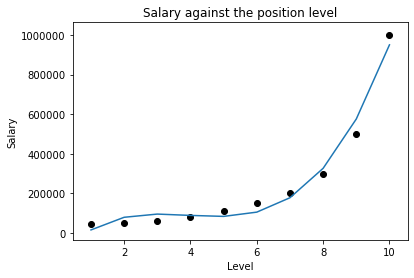

In [11]:
y = dataset.loc[:,'Salary'].values
x = dataset.loc[:,'Level'].values
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)

x_poly = poly_reg.fit_transform(x.reshape(-1,1))
pd.DataFrame(x_poly)

slregressor.fit(x_poly,y)

plt.plot(x,slregressor.predict(x_poly))
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Salary against the position level")
plt.scatter(x,y,c='black')
plt.show()

As we can see the shape of the fitted line is now closer to the overall fit of the data, we can possibly get this line closer to the data by increasing the degree (But we are just showing the overall shape of the model for this example).

Since we are fitting a model with a degree of 3 the formula looks like the following:

$Y = b_0 + b_1 x_1 + b_2 x_1^2 + b_3 x_1^3$ 

Now let's say we want to do a single prediction for this model - we will need to transform the variable in the input:

In [12]:
prediction = slregressor.predict(poly_reg.fit_transform([[6]]))
print("Salary for level 6 of the job:" + str(round(prediction[0],2)))


Salary for level 6 of the job:104820.51


Let's now explore some of the other methods that we can use to predict the data.

## SVR

The next method we will be looking at is Support Vector Regression, this method will try to fit the best line to the data and predict the values.


We will be using the same data set as Polynomial Regression.

Since SVR looks at the distance some standardization / Feature scaling is required on the data.

In [13]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

x_trans = sc_x.fit_transform(x.reshape(-1,1))
y_trans = sc_y.fit_transform(y.reshape(-1,1))


now let's run the model:

c:\users\adam\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Salary against Position in Business')

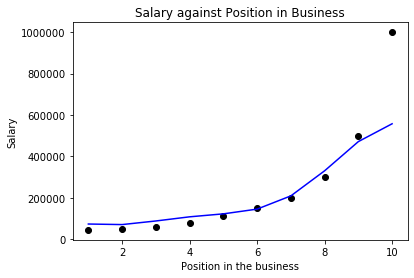

In [14]:
from sklearn.svm import SVR

svr_regressor = SVR(kernel='rbf')

svr_regressor.fit(x_trans,y_trans)

prediction = svr_regressor.predict(x_trans)
prediction = sc_y.inverse_transform(prediction)
plt.scatter(x,y,c='black')
plt.plot(x,prediction,c='b')
plt.xlabel('Position in the business')
plt.ylabel('Salary')
plt.title('Salary against Position in Business')

We have now fitted the model and re-transformed the output for the Y value to plot the predicted values. We can see that the final point does not seem to have been picked up in the prediction.

## Regression Tree

This forms part of CART - Classification and Regression Trees. it is a method that will fit a tree based model to the data to predict the values as best as possible.

Using the same Salary and level data as before let's fit the regression model:

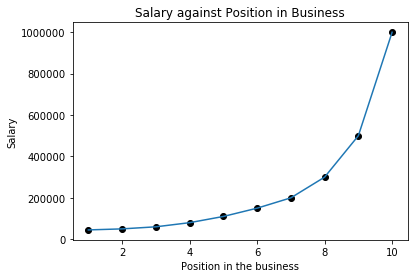

In [15]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x.reshape(-1,1),y.reshape(-1,1))
prediction = tree_reg.predict(x.reshape(-1,1))

plt.scatter(x,y,c='black')
plt.plot (x,prediction)
plt.xlabel('Position in the business')
plt.ylabel('Salary')
plt.title('Salary against Position in Business')
plt.show()

The model is fitting well but this is probably not a good thing as it is too close to the original data we may need to check this by plotting against all the points.

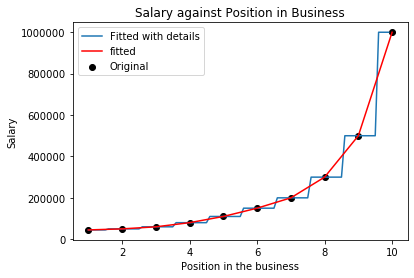

In [16]:
import numpy as np
x_range = np.arange(min(x),max(x),0.1)

plt.scatter(x,y,c='black',label ='Original')
plt.plot (x_range,tree_reg.predict(x_range.reshape(-1,1)),label='Fitted with details')
plt.plot(x,prediction,c='red',label='fitted')
plt.xlabel('Position in the business')
plt.ylabel('Salary')
plt.title('Salary against Position in Business')
plt.legend()
plt.show()

As we can see the data is fitting exactly to the points so we should use caution with this model (But we also only have ten data points and one per level (it may be better to have more data points per level to improve this situation).

In the mean time lets look at a way to visulize the tree model:

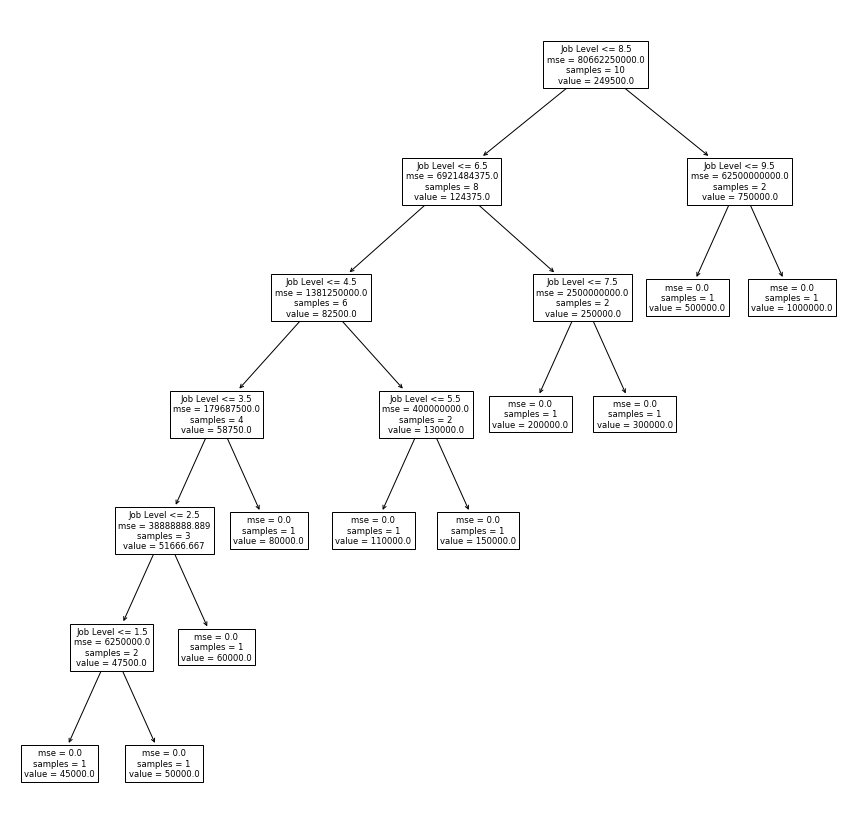

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(tree_reg,feature_names=['Job Level'])
plt.show()

## Random Forest

The final Regression method we will look at is the Random Forest Method, this is an ensemble method that relies on Multiple decision trees to determine a final predictive model.


Again we will use the same dataset as before when fitting this model.

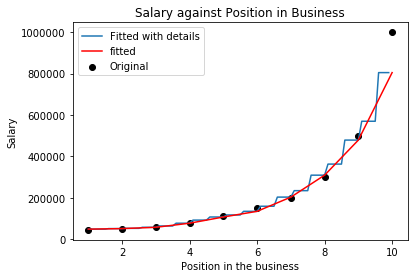

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x.reshape(-1,1),y)
prediction = rf_reg.predict(x.reshape(-1,1))
plt.scatter(x,y,c='black',label ='Original')
plt.plot (x_range,rf_reg.predict(x_range.reshape(-1,1)),label='Fitted with details')
plt.plot(x,prediction,c='red',label='fitted')
plt.xlabel('Position in the business')
plt.ylabel('Salary')
plt.title('Salary against Position in Business')
plt.legend()
plt.show()

# Classification methods

The first classification method that we will be going through is Logistic Regression. With this method we will look at both of the libraries that can be used to do the predictions.

The data we will be using is a prediction of the purchase of a good based on factors such as age and estimated Salary.

Now that we have a dataset with $n=400$ we should split the sample into a train and test sample which we will be doing for the models using this data.

In [19]:
from sklearn.model_selection import train_test_split
dataset = pd.read_csv('data\Social_Network_Ads.csv')
sc_x = StandardScaler()
y = dataset.iloc[:,-1]
x = dataset.iloc[:,2:4]
x = sc_x.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.25)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
prediction = log_reg.predict(x_test)

Now that we havea  predicted value it always useful to see how things got allocated against their actual value using the confusion Matrix:

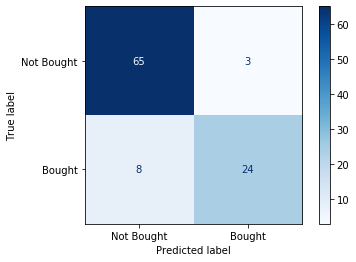

In [20]:
from sklearn.metrics import plot_confusion_matrix 
plot_confusion_matrix(log_reg,x_test,y_test,display_labels=['Not Bought','Bought'],cmap='Blues')

This is the usual output we expect from sklearn with us having to address the instance we have created to find the Coefficients and use other calls. Let's now look at the statsmodels library and see what is avaliable as output.

In [21]:
x_train2 = sm.add_constant(x_train)
log_reg2=sm.Logit(exog=x_train2,endog=y_train)
log_reg2.fit().summary(yname='Purchase Behaviour',xname=['Intercept','Age','Income'])

Optimization terminated successfully.
         Current function value: 0.371982
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     Purchase Behaviour   No. Observations:                  300
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            2
Date:                Wed, 26 Feb 2020   Pseudo R-squ.:                  0.4355
Time:                        16:05:05   Log-Likelihood:                -111.59
converged:                       True   LL-Null:                       -197.69
Covariance Type:            nonrobust   LLR p-value:                 4.080e-38
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1036      0.189     -5.847      0.000      -1.474      -0.734
Age            2.3502      0.300      7.831      0.000       1.762       2.938
Income         1.1981      0.206      5.821      0.000       0.795       1.601
==============================================================================
"""

Again this output looks very similar to other software we may have used, the one key consideration is remembering to include the intercept variable as it is not automatically added.

## KNN

K Nearest Neighbors is the next classification method we will look at. Again we will use the same data set and will need to use the scaling on X variables as this is a distance based classification.

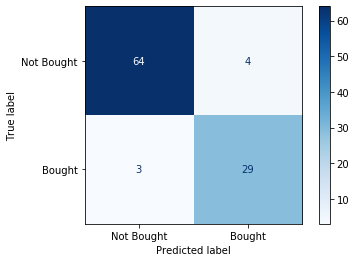

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn_class = KNeighborsClassifier()
knn_class.fit(x_train,y_train)
plot_confusion_matrix(knn_class,x_test,y_test,display_labels=['Not Bought','Bought'],cmap='Blues')

## Classification Trees

Just like Regression Trees we also have a tree method for Classification's, We will be using the same data as before to try to predict the purchase behavor of the respondents.

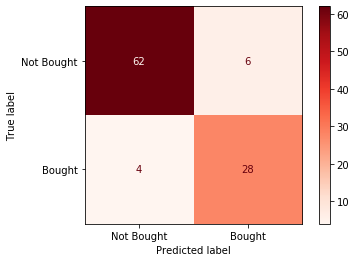

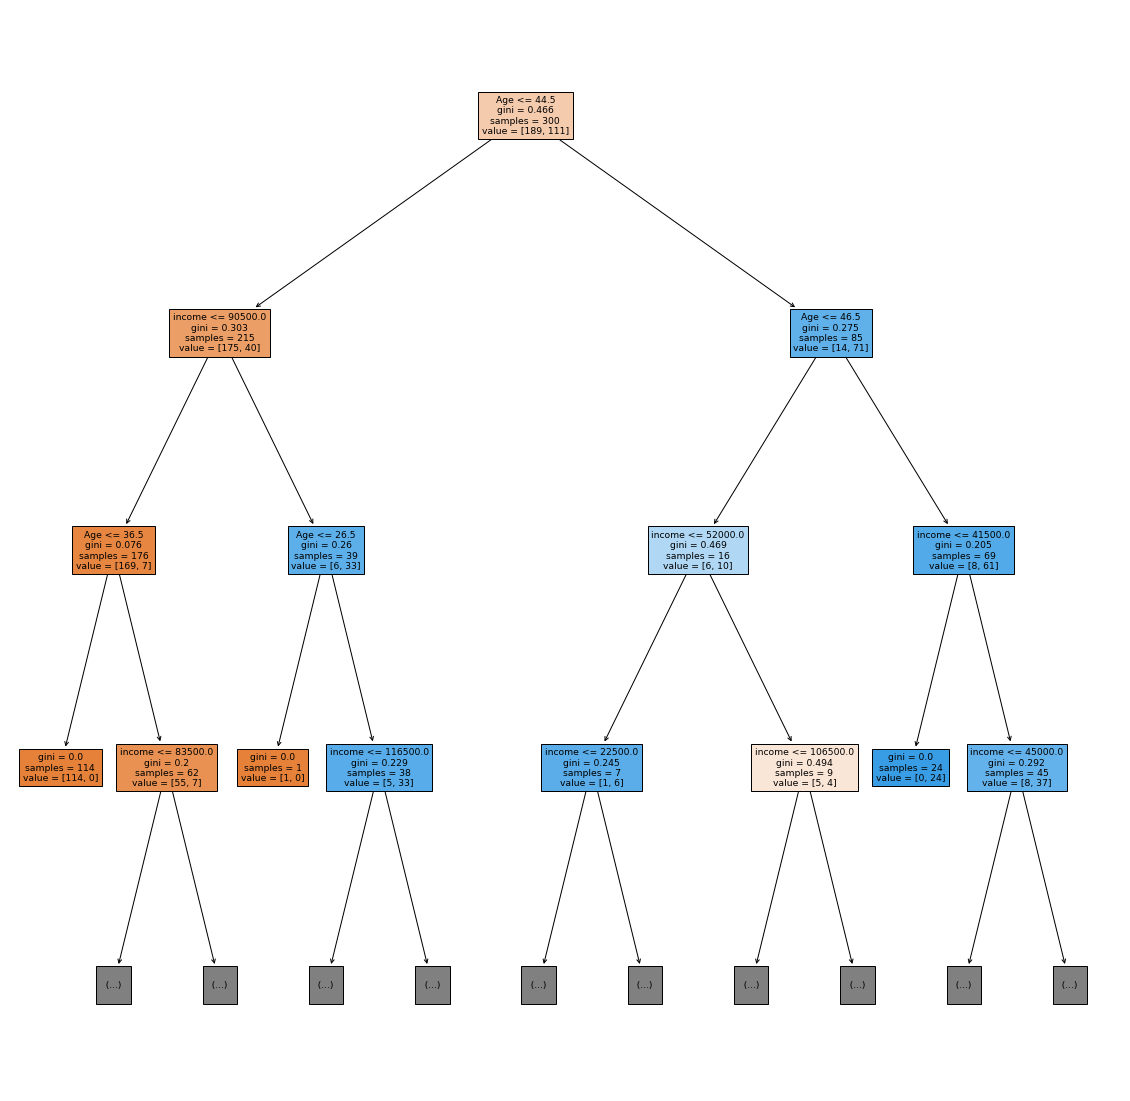

In [23]:
from sklearn.tree import DecisionTreeClassifier

y = dataset.iloc[:,-1]
x = dataset.iloc[:,2:4]
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.25)
tree_class = DecisionTreeClassifier()
tree_class.fit(x_train,y_train)
plot_confusion_matrix(tree_class,x_test,y_test,display_labels=["Not Bought",'Bought'],cmap='Reds')
plt.figure(figsize=(20,20))
plot_tree(tree_class,feature_names=['Age','income'],max_depth=3,filled=True)
plt.show()

I have reduced the depth displayed so we can have a better view of the Tree model but we can see a good fit on teh confusion matrix.

## Random Forest

The next section is Random forest, again this is an ensmeble method that uses multiple Decision trees to determine the best classifier for our data, we will use the same dataset again:

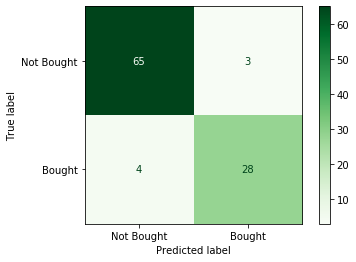

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf_class =RandomForestClassifier()
rf_class.fit(x_train,y_train)
plot_confusion_matrix(rf_class,x_test,y_test,display_labels=['Not Bought','Bought'],cmap='Greens')
